In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Dataset
#df = pd.read_csv(r'total_data.csv', low_memory=False)
#Use only the Semptember df 
df = pd.read_csv(r'setembro2019.csv', low_memory=False)
df.head
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34329 entries, 0 to 34328
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 27.8+ MB


In [24]:
#Transform the price columns to numeric
def convert_currency(column):
    return df[column].replace('[\$,]', '', regex=True).astype(float)

price_columns = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']
for col in price_columns:
    df[col] = convert_currency(col)

In [25]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.432900e+04,3.432900e+04,3.432900e+04,34315.000000,34315.000000,34329.000000,34329.000000,34329.000000,34272.000000,34300.000000,...,17316.000000,17309.000000,17317.000000,17314.000000,17314.000000,34329.000000,34329.000000,34329.000000,34329.000000,18285.000000
mean,1.744310e+07,2.019092e+13,7.015939e+07,9.302288,9.302288,-22.965061,-43.254485,4.190014,1.688448,1.638513,...,9.411989,9.782194,9.752267,9.731951,9.328000,7.646858,6.683271,0.753911,0.090011,0.618036
std,1.106711e+07,8.824347e+00,7.122795e+07,39.530907,39.530907,0.035320,0.097822,2.606760,1.483623,1.052694,...,1.108830,0.772284,0.800108,0.749477,1.018182,29.889300,29.395366,1.959514,0.740312,0.879252
min,1.787800e+04,2.019092e+13,2.616000e+03,0.000000,0.000000,-23.073400,-43.737090,1.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.992237e+06,2.019092e+13,1.426431e+07,1.000000,1.000000,-22.984690,-43.324050,2.000000,1.000000,1.000000,...,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.100000
50%,1.413587e+07,2.019092e+13,5.184224e+07,1.000000,1.000000,-22.970710,-43.200310,4.000000,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.240000
75%,2.740455e+07,2.019092e+13,8.695143e+07,3.000000,3.000000,-22.945390,-43.187070,5.000000,2.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.000000,1.000000,0.000000,0.810000
max,3.884766e+07,2.019092e+13,2.973608e+08,772.000000,772.000000,-22.750380,-43.104060,160.000000,200.000000,13.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,249.000000,249.000000,40.000000,18.000000,10.510000


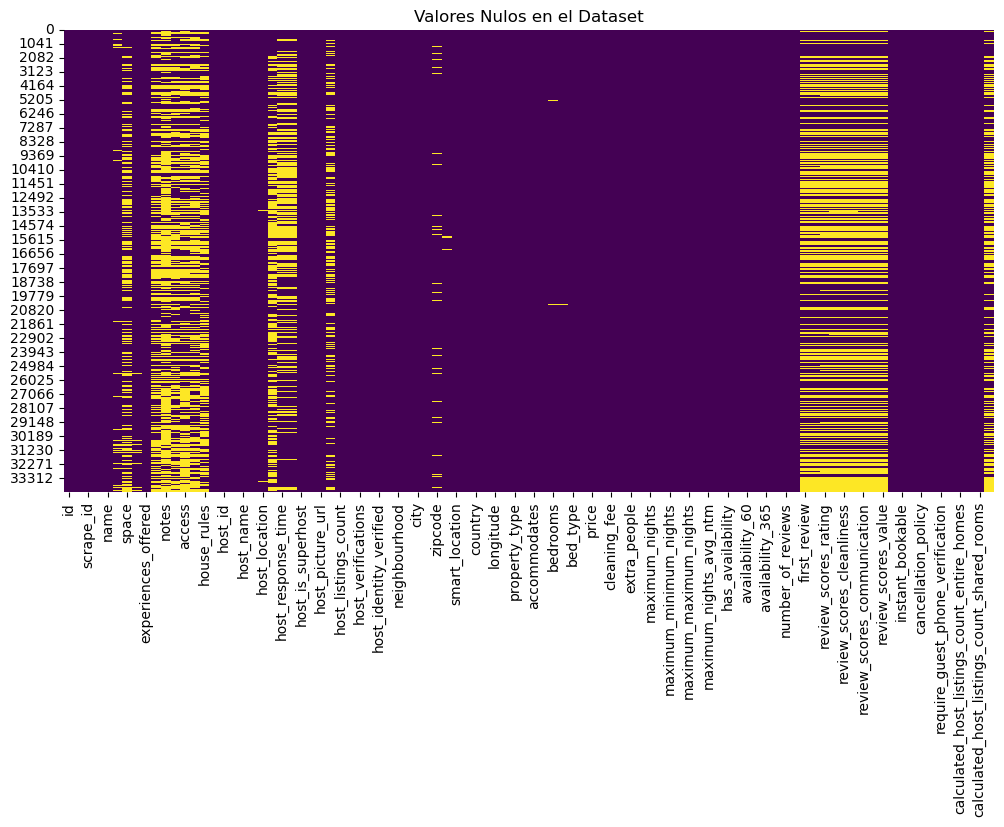

In [31]:
#Check null values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Valores Nulos en el Dataset")
plt.show()

In [32]:
# Eliminate columns with more 80% null values
df = df.dropna(axis=1, how='all')


In [33]:
#Fill null values in prices with de average
for col in price_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [34]:
#Fill in category with the more frecuency value
categorical_columns = ['neighbourhood', 'room_type', 'property_type']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34329 entries, 0 to 34328
Data columns (total 96 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            34329 non-null  int64  
 1   listing_url                                   34329 non-null  object 
 2   scrape_id                                     34329 non-null  int64  
 3   last_scraped                                  34329 non-null  object 
 4   name                                          34265 non-null  object 
 5   summary                                       32445 non-null  object 
 6   space                                         21117 non-null  object 
 7   description                                   33472 non-null  object 
 8   experiences_offered                           34329 non-null  object 
 9   neighborhood_overview                         18828 non-null 

# Top 10 Most Popular Neighbourhoods

In [53]:
# Group by neighbourhood and calculate the number of listings, average price, and average review score
neighbourhood_stats = df.groupby('neighbourhood_cleansed').agg(
    number_of_listings=('id', 'count'),
    average_price=('price', 'mean'),
    average_review_score=('review_scores_rating', 'mean')
).reset_index()

# Sort by number of listings to identify the most popular neighbourhood
neighbourhood_stats = neighbourhood_stats.sort_values(by='number_of_listings', ascending=False)

# Display the most popular neighbourhood
most_popular_neighbourhood = neighbourhood_stats.iloc[0]
print(f"Most Popular Neighbourhood: {most_popular_neighbourhood['neighbourhood_cleansed']}")
print(f"Number of Listings: {most_popular_neighbourhood['number_of_listings']}")
print(f"Average Price: R${most_popular_neighbourhood['average_price']:.2f}")
print(f"Average Review Score: {most_popular_neighbourhood['average_review_score']:.0f}/100")

Most Popular Neighbourhood: Copacabana
Number of Listings: 8530
Average Price: R$498.17
Average Review Score: 93/100


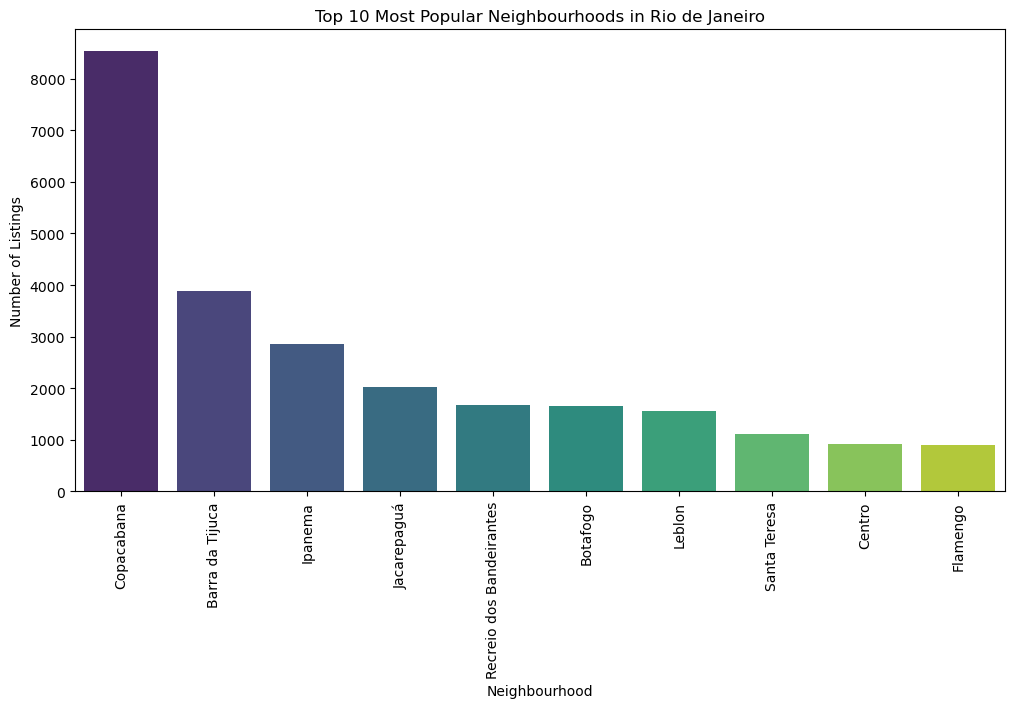

In [54]:
# Select the top 10 most popular neighbourhoods
top_10_neighbourhoods = neighbourhood_stats.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_neighbourhoods, x='neighbourhood_cleansed', y='number_of_listings', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Top 10 Most Popular Neighbourhoods in Rio de Janeiro')
plt.show()

# Top 10 Most Expensive Neighbourhoods

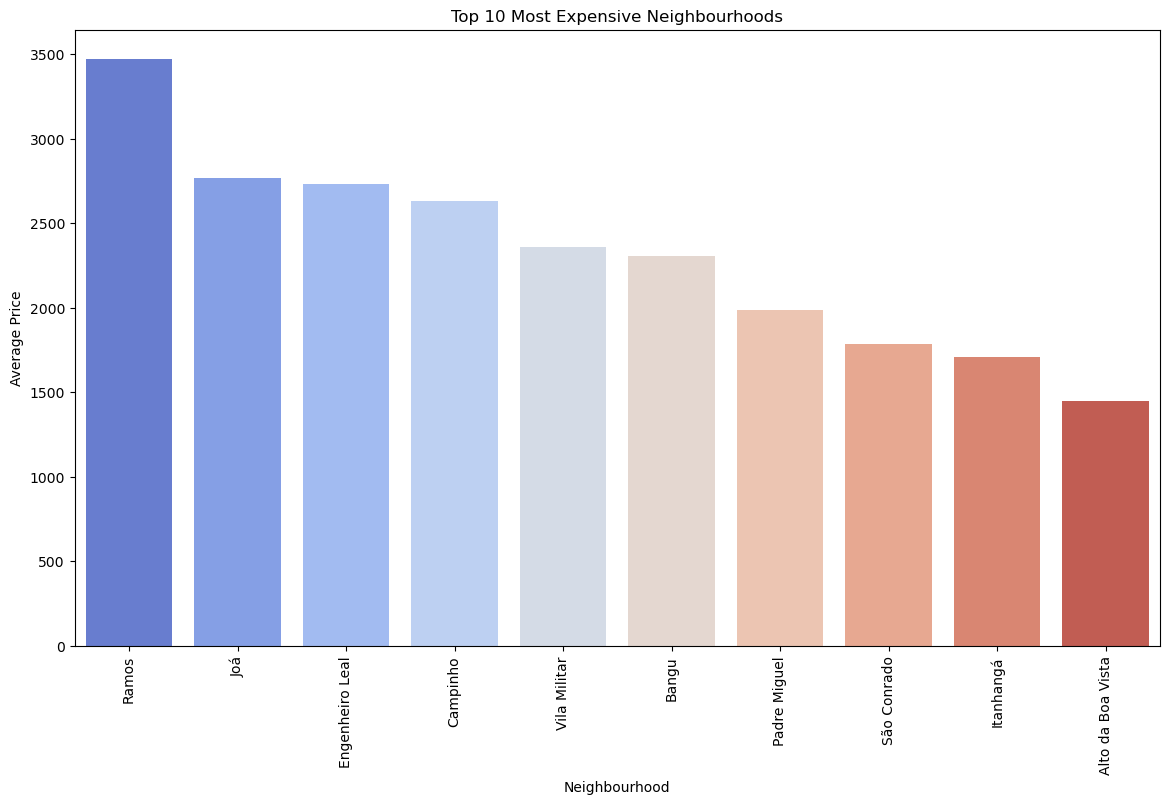

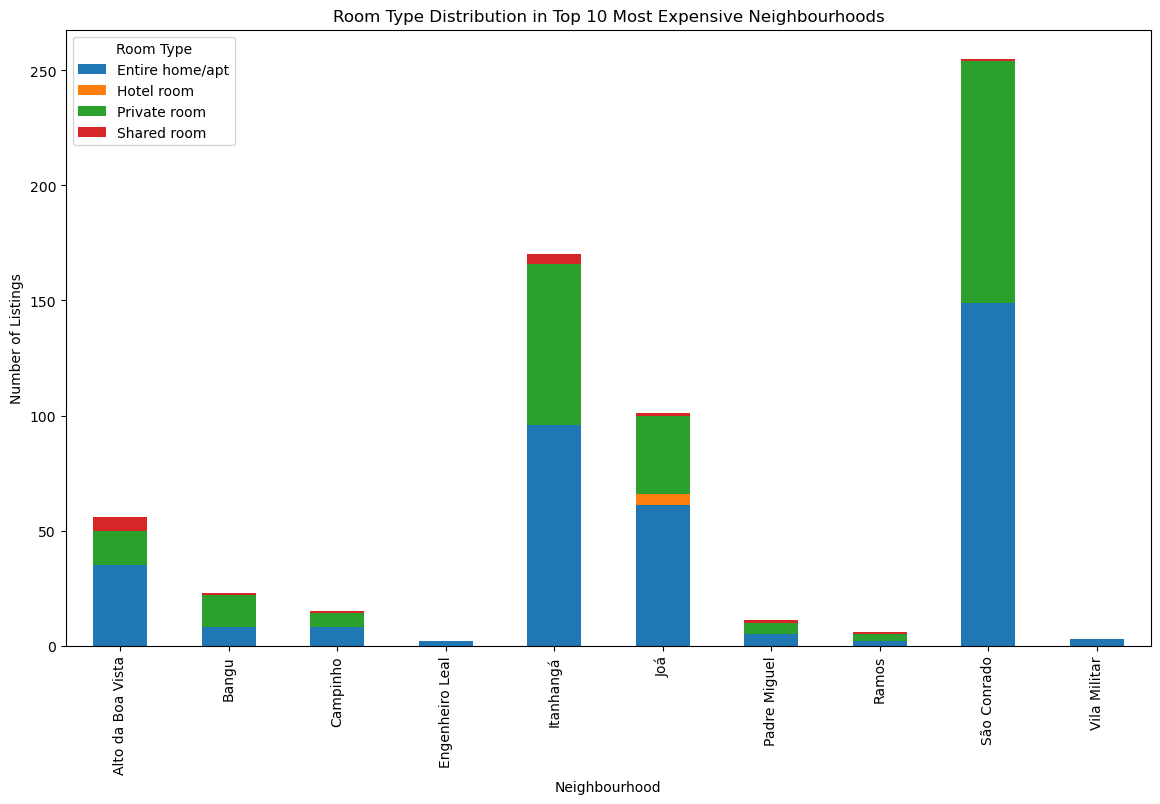

Most Expensive Neighbourhood: Ramos
Average Price: R$3472.33


In [55]:
# Sort by average price and select the Top 10 most expensive neighbourhoods
top_10_expensive_neighbourhoods = neighbourhood_stats.sort_values(by='average_price', ascending=False).head(10)

# Visualise the results
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_expensive_neighbourhoods, x='neighbourhood_cleansed', y='average_price', palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.title('Top 10 Most Expensive Neighbourhoods')
plt.show()

# Analyse room types in these neighbourhoods
room_type_distribution = df[df['neighbourhood_cleansed'].isin(top_10_expensive_neighbourhoods['neighbourhood_cleansed'])].groupby(
    ['neighbourhood_cleansed', 'room_type']).size().unstack()

# Visualise room type distribution
room_type_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.title('Room Type Distribution in Top 10 Most Expensive Neighbourhoods')
plt.xticks(rotation=90)
plt.legend(title='Room Type')
plt.show()

# Sort by average price and select the Top 10 most expensive neighbourhoods
top_10_expensive_neighbourhoods = neighbourhood_stats.sort_values(by='average_price', ascending=False).head(10)

# Display the most expensive neighbourhood
most_expensive_neighbourhood = top_10_expensive_neighbourhoods.iloc[0]
print(f"Most Expensive Neighbourhood: {most_expensive_neighbourhood['neighbourhood_cleansed']}")
print(f"Average Price: R${most_expensive_neighbourhood['average_price']:.2f}")

# The most "normal" and accessible price neighbourhoods

Neighbourhood near median price: Rocha Miranda
Average price: R$384.20
Neighbourhood near 75th percentile price: Cascadura
Average price: R$587.25


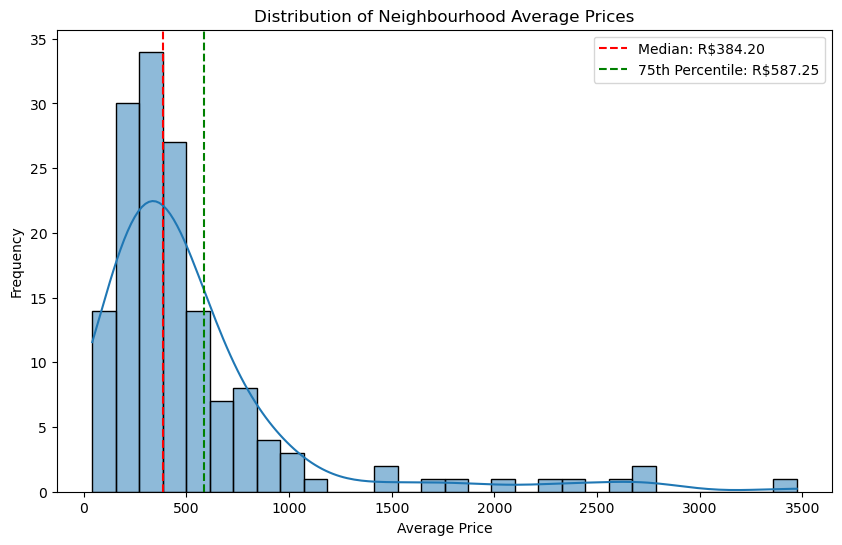

In [67]:
# 1. Median Average Price
median_price = neighbourhood_stats['average_price'].median()
neighbourhood_stats['price_difference_median'] = abs(neighbourhood_stats['average_price'] - median_price)
median_neighbourhood = neighbourhood_stats.sort_values(by='price_difference_median').iloc[0]

print(f"Neighbourhood near median price: {median_neighbourhood['neighbourhood_cleansed']}")
print(f"Average price: R${median_neighbourhood['average_price']:.2f}")

# 2. 75th Percentile Average Price
percentile_75_price = neighbourhood_stats['average_price'].quantile(0.75)
neighbourhood_stats['price_difference_75th'] = abs(neighbourhood_stats['average_price'] - percentile_75_price)
percentile_75_neighbourhood = neighbourhood_stats.sort_values(by='price_difference_75th').iloc[0]

print(f"Neighbourhood near 75th percentile price: {percentile_75_neighbourhood['neighbourhood_cleansed']}")
print(f"Average price: R${percentile_75_neighbourhood['average_price']:.2f}")

#Removing the temporary columns.
neighbourhood_stats.drop(columns=['price_difference_median', 'price_difference_75th'], inplace=True)

# 3. Visualisation
plt.figure(figsize=(10, 6))
sns.histplot(neighbourhood_stats['average_price'], bins=30, kde=True)
plt.axvline(median_price, color='red', linestyle='--', label=f'Median: R${median_price:.2f}')
plt.axvline(percentile_75_price, color='green', linestyle='--', label=f'75th Percentile: R${percentile_75_price:.2f}')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Distribution of Neighbourhood Average Prices')
plt.legend()
plt.show()

# Most common accommodation price in Rio de Janeiro

Descriptive Statistics of Average Prices:
count     153.000000
mean      537.166355
std       547.980186
min        42.000000
25%       246.500000
50%       384.200000
75%       587.250000
max      3472.333333
Name: average_price, dtype: float64


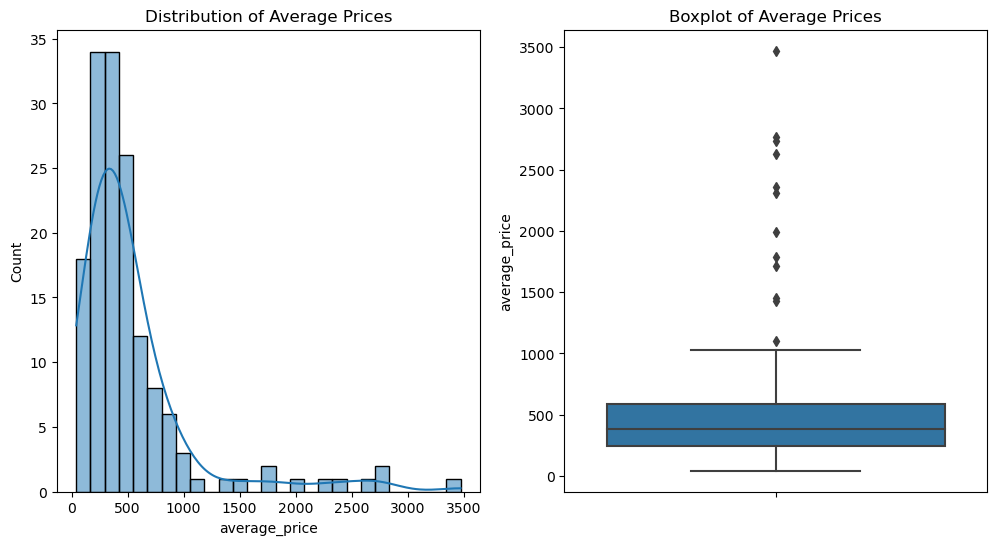


Estimated Common Value (based on median): R$384.20
Standard Deviation: R$547.98
Rango de valor común estimado: R$163.78 a R$932.18


In [70]:
# 1. Descriptive Statistics
print("Descriptive Statistics of Average Prices:")
print(neighbourhood_stats['average_price'].describe())

# 2. Visualising the Distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(neighbourhood_stats['average_price'], kde=True)
plt.title('Distribution of Average Prices')

plt.subplot(1, 2, 2)
sns.boxplot(y=neighbourhood_stats['average_price'])
plt.title('Boxplot of Average Prices')

plt.show()

# 3. Identifying a "Common Value"
median_price = neighbourhood_stats['average_price'].median()
std_price = neighbourhood_stats['average_price'].std()

print(f"\nEstimated Common Value (based on median): R${median_price:.2f}")
print(f"Standard Deviation: R${std_price:.2f}")

# Common value range, median +/- 1 standard deviation (using absolute values for lower bound)
lower_bound = abs(median_price - std_price)
upper_bound = median_price + std_price
print(f"Rango de valor común estimado: R${lower_bound:.2f} a R${upper_bound:.2f}")

# Top 20 Listings by Review Scores

              room_type host_is_superhost  \
count                20                20   
unique                3                 1   
top     Entire home/apt                 f   
freq                 13                20   

                                                amenities  
count                                                  20  
unique                                                 20  
top     {"Smoking allowed","Pets allowed","Suitable fo...  
freq                                                    1  


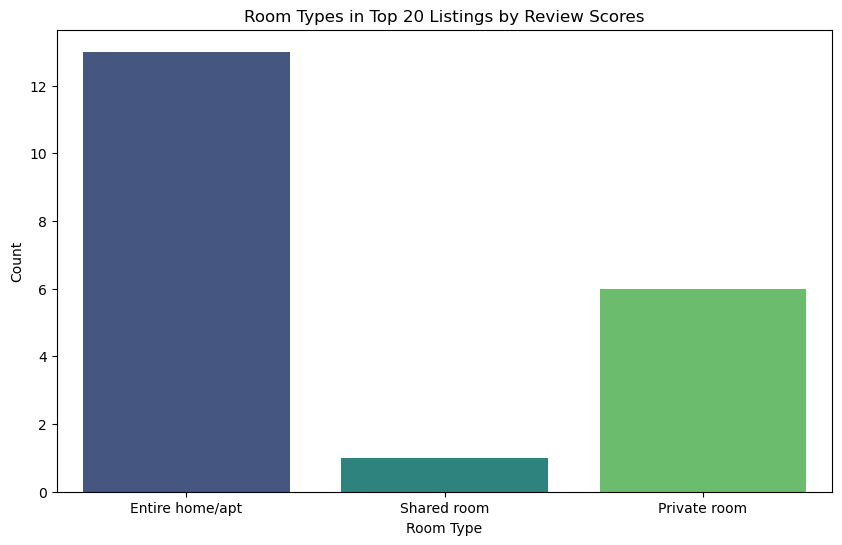

In [44]:
# Sort by review scores and select the Top 20 listings
top_20_listings = df.sort_values(by='review_scores_rating', ascending=False).head(20)

# Analyse common features (e.g., amenities, host status, room type)
common_features = top_20_listings[['room_type', 'host_is_superhost', 'amenities']]

# Display the common features
print(common_features.describe())

# Visualise room type distribution in Top 20 listings
plt.figure(figsize=(10, 6))
sns.countplot(data=top_20_listings, x='room_type', palette='viridis')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Types in Top 20 Listings by Review Scores')
plt.show()

# Top 10 Room Types by Popularity

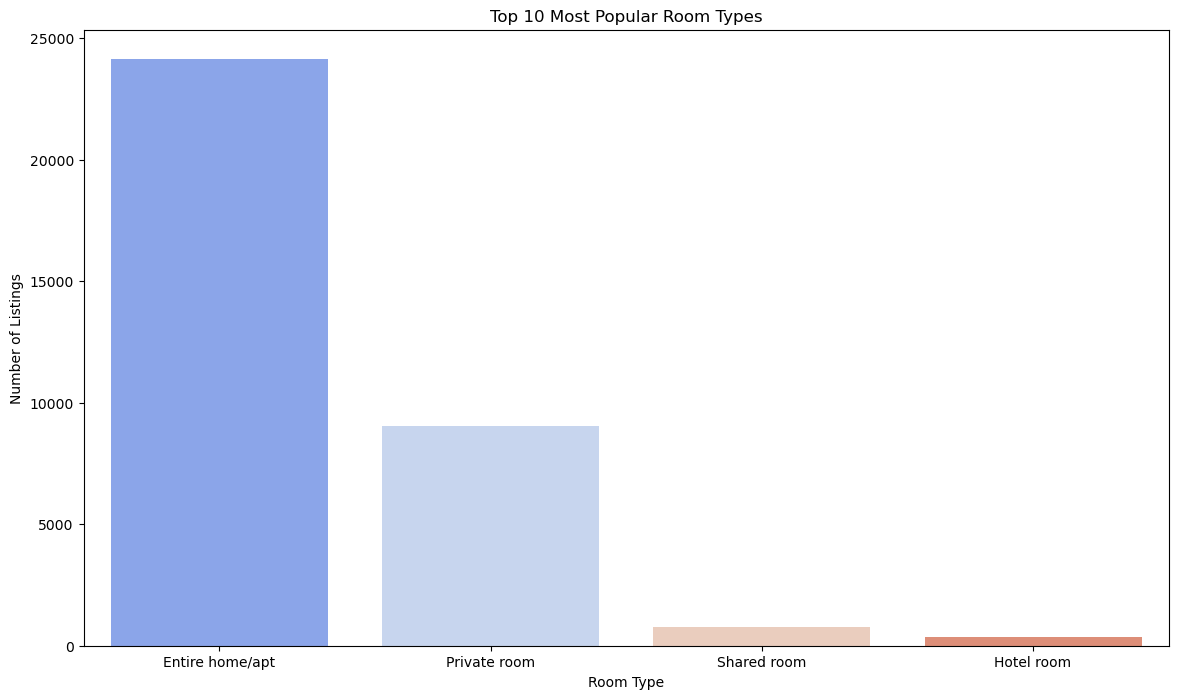

In [63]:
# Group by room type and calculate the number of listings
room_type_stats = df.groupby('room_type').agg(
    number_of_listings=('id', 'count'),
    average_price=('price', 'mean')
).reset_index()

# Sort by number of listings and select the Top 10
top_10_room_types = room_type_stats.sort_values(by='number_of_listings', ascending=False).head(10)

# Visualise the results
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_room_types, x='room_type', y='number_of_listings', palette='coolwarm')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Top 10 Most Popular Room Types')
plt.show()

# Analyse price and availability trends by month for Top 10 room types
df['month'] = pd.to_datetime(df['last_scraped']).dt.month
df['month'] = df['month'].astype(int) # Asegurar que 'month' es un entero
top_room_types_list = top_10_room_types['room_type'].tolist()
top_room_types_data = df[df['room_type'].isin(top_room_types_list)]

room_type_trends = top_room_types_data.groupby(['month', 'room_type']).agg(
    average_price=('price', 'mean'),
    average_availability=('availability_30', 'mean')
).reset_index()


Common Features of Top 20 Listings:
              room_type host_is_superhost  \
count                20                20   
unique                3                 1   
top     Entire home/apt                 f   
freq                 13                20   

                                                amenities  
count                                                  20  
unique                                                 20  
top     {"Smoking allowed","Pets allowed","Suitable fo...  
freq                                                    1  


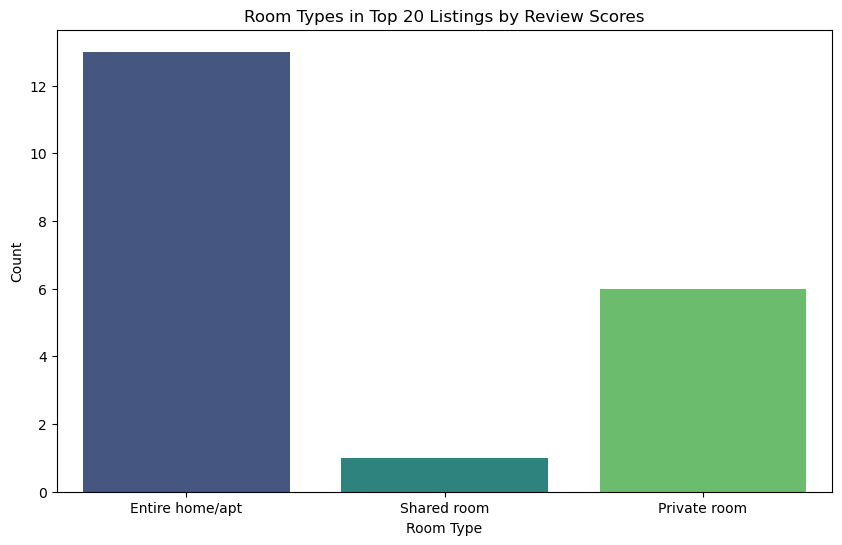

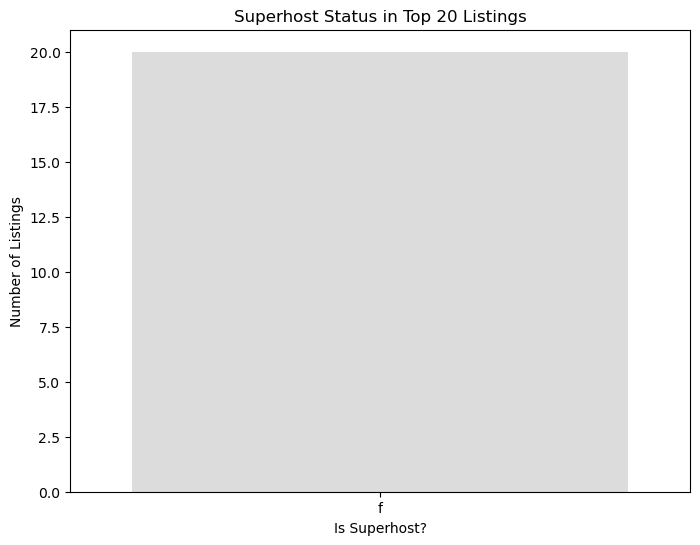

In [73]:
# Sort by review scores and select the Top 20 listings
top_20_listings = df.sort_values(by='review_scores_rating', ascending=False).head(20)

# Analyse common features (e.g., room type, superhost status, amenities)
common_features = top_20_listings[['room_type', 'host_is_superhost', 'amenities']]

# Display the common features
print("Common Features of Top 20 Listings:")
print(common_features.describe())

# Visualise room type distribution in Top 20 listings
plt.figure(figsize=(10, 6))
sns.countplot(data=top_20_listings, x='room_type', palette='viridis')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Types in Top 20 Listings by Review Scores')
plt.show()

# Analyse superhost status in Top 20 listings
superhost_counts = top_20_listings['host_is_superhost'].value_counts()

# Visualise superhost status
plt.figure(figsize=(8, 6))
sns.barplot(x=superhost_counts.index, y=superhost_counts.values, palette='coolwarm')
plt.xlabel('Is Superhost?')
plt.ylabel('Number of Listings')
plt.title('Superhost Status in Top 20 Listings')
plt.show()

# Analyse amenities in Top 20 listings
# Count the frequency of each amenity in the top 20 listings
from collections import Counter

# Split amenities and count their frequency
amenities_list = top_20_listings['amenities'].apply(lambda x: x.strip('{}').replace('"', '').split(','))
amenities_counter = Counter([amenity for sublist in amenities_list for amenity in sublist])

# Get the top 10 most common amenities
top_10_amenities = amenities_counter.most_common(10)



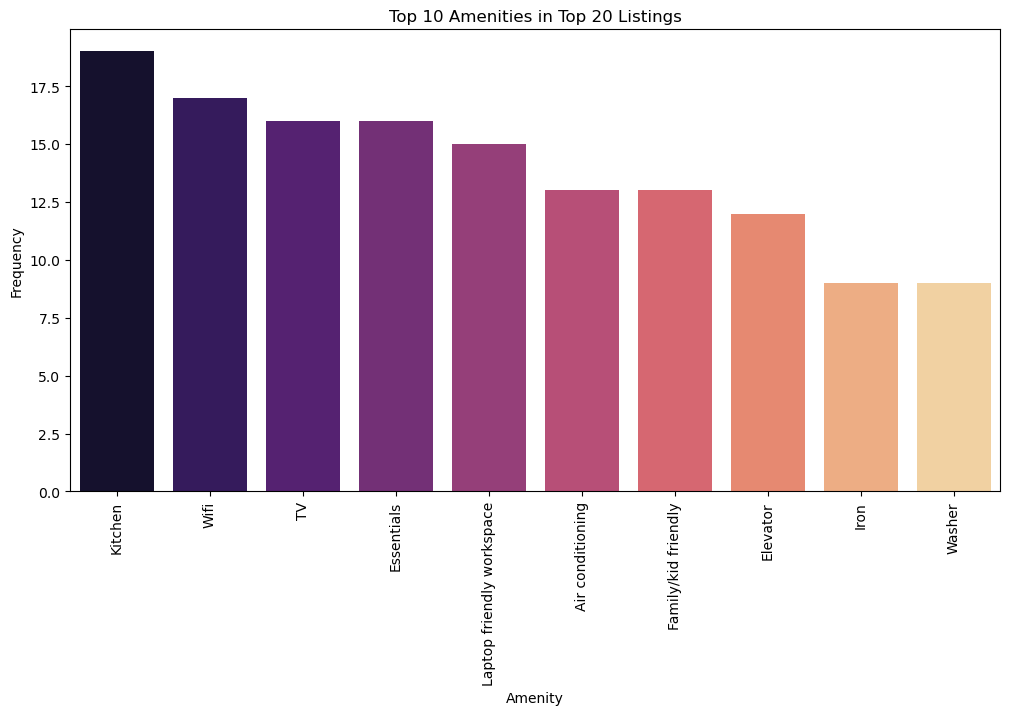

In [72]:
# Visualise the top 10 amenities
plt.figure(figsize=(12, 6))
sns.barplot(x=[x[0] for x in top_10_amenities], y=[x[1] for x in top_10_amenities], palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Amenity')
plt.ylabel('Frequency')
plt.title('Top 10 Amenities in Top 20 Listings')
plt.show()

In [75]:
# Sort by review scores and select the Top 20 listings
top_20_listings = df.sort_values(by='review_scores_rating', ascending=False).head(20)

# Analyse room types in Top 20 listings
room_type_counts = top_20_listings['room_type'].value_counts(normalize=True) * 100

# Analyse superhost status in Top 20 listings
# Check if 'host_is_superhost' contains 't'/'f' or True/False
if top_20_listings['host_is_superhost'].isin(['t', 'f']).any():
    superhost_counts = top_20_listings['host_is_superhost'].value_counts(normalize=True) * 100
    superhost_percentage = superhost_counts.get('t', 0)  # Use 't' if it exists
else:
    superhost_counts = top_20_listings['host_is_superhost'].value_counts(normalize=True) * 100
    superhost_percentage = superhost_counts.get(True, 0)  # Use True if it exists

# Analyse amenities in Top 20 listings
from collections import Counter

# Split amenities and count their frequency
amenities_list = top_20_listings['amenities'].apply(lambda x: x.strip('{}').replace('"', '').split(','))
amenities_counter = Counter([amenity for sublist in amenities_list for amenity in sublist])

# Get the top 10 most common amenities
top_10_amenities = amenities_counter.most_common(10)

# Print the results
print("What Makes a Listing Top-Rated?")
print("--------------------------------")
print(f"1. Room Types: {room_type_counts.get('Entire home/apt', 0):.0f}% of the top-rated listings are entire homes/apartments.")
print(f"2. Superhosts: {superhost_percentage:.0f}% of the top-rated listings are managed by superhosts.")
print("3. Top 10 Amenities:")
for amenity, count in top_10_amenities:
    print(f"   - {amenity}: {count} listings")

What Makes a Listing Top-Rated?
--------------------------------
1. Room Types: 65% of the top-rated listings are entire homes/apartments.
2. Superhosts: 0% of the top-rated listings are managed by superhosts.
3. Top 10 Amenities:
   - Kitchen: 19 listings
   - Wifi: 17 listings
   - TV: 16 listings
   - Essentials: 16 listings
   - Laptop friendly workspace: 15 listings
   - Air conditioning: 13 listings
   - Family/kid friendly: 13 listings
   - Elevator: 12 listings
   - Iron: 9 listings
   - Washer: 9 listings


# Top 10 Hosts by Number of Listings

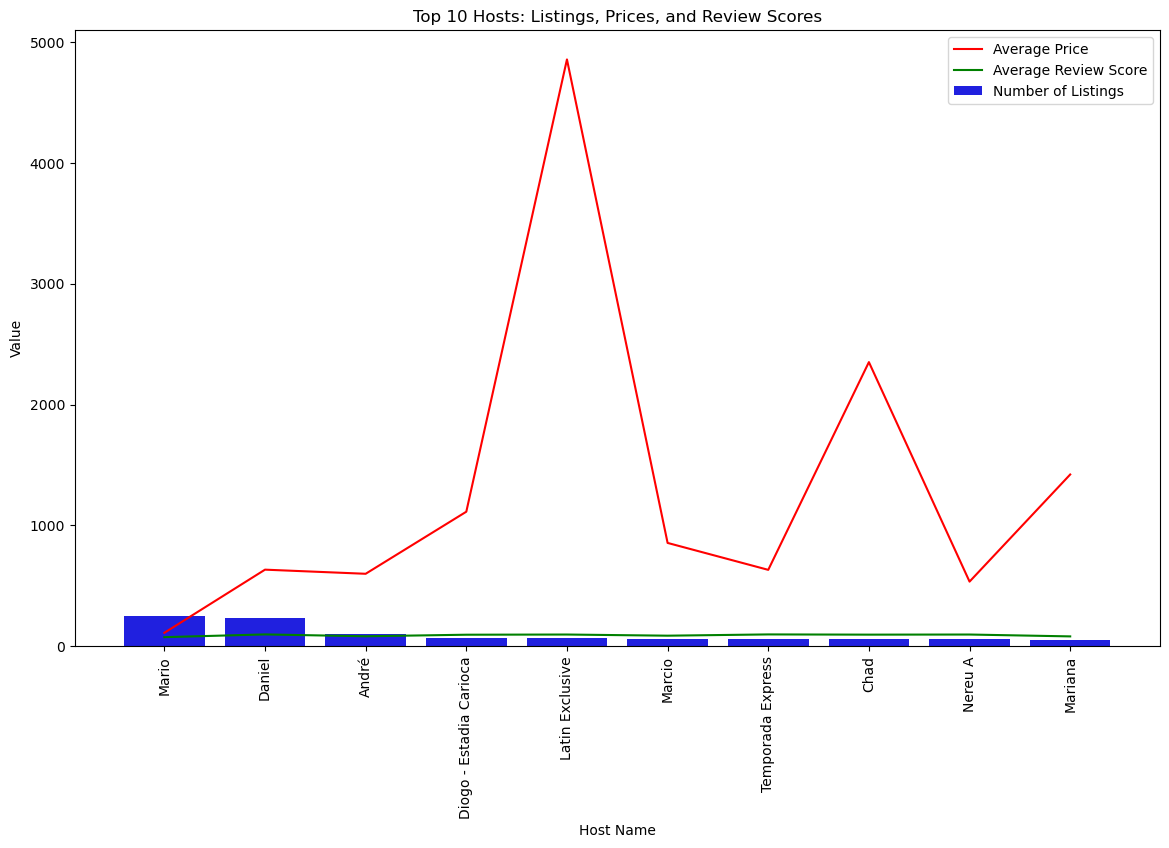

In [48]:
# Group by host and calculate the number of listings, average price, and average review score
host_stats = df.groupby('host_id').agg(
    host_name=('host_name', 'first'),
    number_of_listings=('id', 'count'),
    average_price=('price', 'mean'),
    average_review_score=('review_scores_rating', 'mean')
).reset_index()

# Sort by number of listings and select the Top 10 hosts
top_10_hosts = host_stats.sort_values(by='number_of_listings', ascending=False).head(10)

# Visualise the results
plt.figure(figsize=(14, 8))
sns.barplot(data=top_10_hosts, x='host_name', y='number_of_listings', color='blue', label='Number of Listings')
sns.lineplot(data=top_10_hosts, x='host_name', y='average_price', color='red', label='Average Price')
sns.lineplot(data=top_10_hosts, x='host_name', y='average_review_score', color='green', label='Average Review Score')
plt.xticks(rotation=90)
plt.xlabel('Host Name')
plt.ylabel('Value')
plt.title('Top 10 Hosts: Listings, Prices, and Review Scores')
plt.legend()
plt.show()